In [ ]:
# Q1
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df['species']= iris.target

X_train, X_test, y_train, y_test = train_test_split(iris_df.drop(columns='species'), iris_df['species'], test_size=0.2, random_state=42)

log_reg = LogisticRegression(multi_class='ovr', max_iter=200)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.67%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# Q2
import pandas as pd
df=pd.read_csv('weather.csv')
df

,Outlook,Temp,Humidity,Windy,Play
0,rainy,hot,high,0,0
1,rainy,hot,high,1,0
2,overcast,hot,high,0,1
3,sunny,mild,high,0,1
4,sunny,cool,normal,0,1
5,sunny,cool,normal,1,0
6,overcast,cool,normal,1,1
7,rainy,mild,high,0,0
8,rainy,cool,normal,0,1
9,sunny,mild,normal,0,1


In [ ]:
# one hot encoding
df_encode=pd.get_dummies(df, columns=['Outlook', 'Temp','Humidity']).astype(int)
y = df_encode['Play']
x = df_encode.drop(columns='Play', axis=1)
print(y.head())
print(x.head())

0    0
1    0
2    1
3    1
4    1
Name: Play, dtype: int64
   Windy  Outlook_overcast  Outlook_rainy  ...  Temp_mild  Humidity_high  Humidity_normal
0      0                 0              1  ...          0              1                0
1      1                 0              1  ...          0              1                0
2      0                 1              0  ...          0              1                0
3      0                 0              0  ...          1              1                0
4      0                 0              0  ...          0              0                1

[5 rows x 9 columns]


Accuracy: 1.0


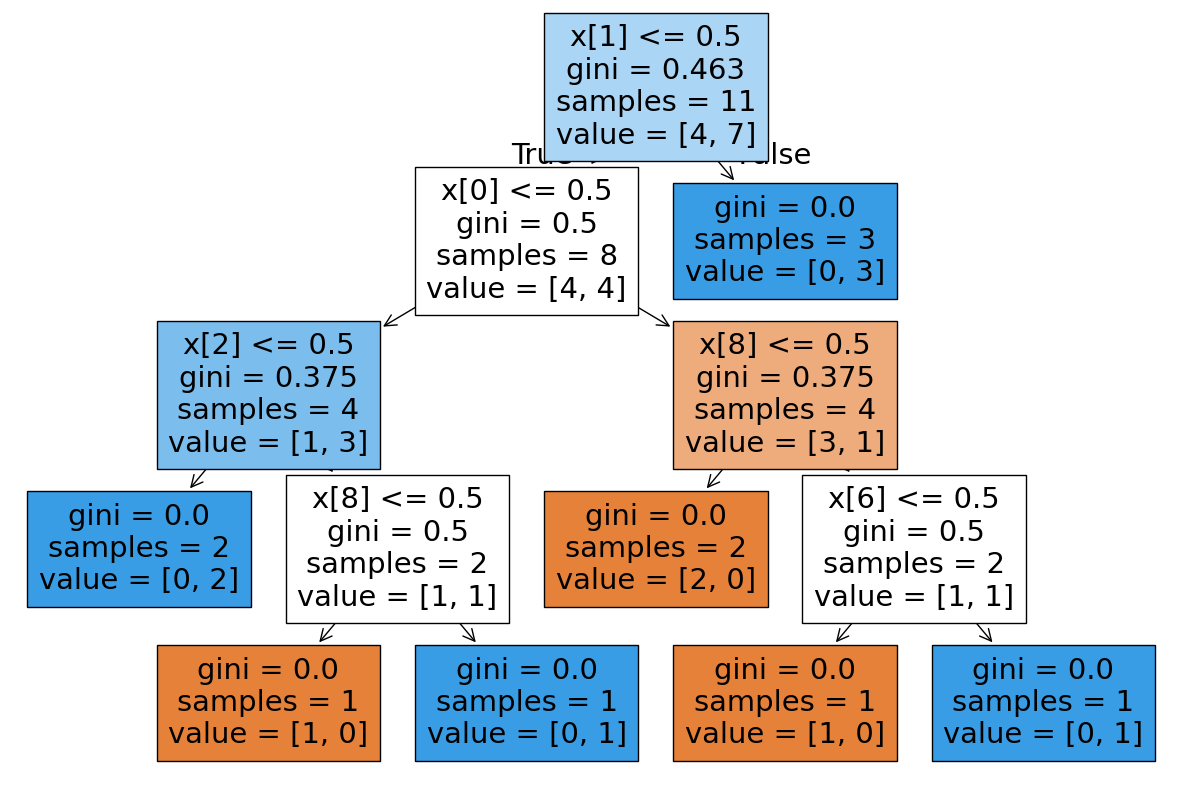

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

train_data, test_data, train_output,test_output = train_test_split(x,y, test_size=0.2, random_state=42)

treemodel=DecisionTreeClassifier()
treemodels=DecisionTreeClassifier(criterion="entropy")
treemodels.fit(train_data,train_output)
treemodel.fit(train_data,train_output)
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

pred=treemodel.predict(test_data)

accuracy = accuracy_score(test_output,pred)
print("Accuracy:", accuracy)

Accuracy: 98.06%


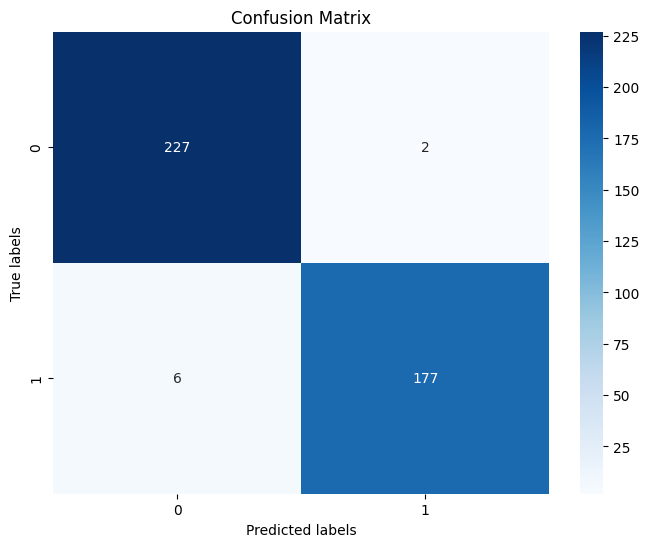

In [ ]:
# Q3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://drive.google.com/uc?id=12r4j7yjGC4s_TigKEHyISSY1NSPzF3eX'
data = pd.read_csv(url)

data.columns = ['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class']

X = data[['Variance', 'Skewness', 'Curtosis', 'Entropy']]
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='gini', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()